<a href="https://colab.research.google.com/github/tomaszjezak/Content-Genius/blob/main/lstm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras.backend as K
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
import yfinance
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    train_custom_mae = history.history['custom_close_mae']  # Updated to custom 'Close' MAE metric
    test_custom_mae = history.history['val_custom_close_mae']  # Updated to custom 'Close' MAE metric
    epochs = range(len(train_loss))

    # plot loss
    plt.clf()
    fig = plt.figure()
    plt.plot(train_loss, label='train_loss')
    plt.plot(test_loss, label='test_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Loss')
    plt.show()

    # plot custom 'Close' MAE
    plt.clf()
    fig = plt.figure()
    plt.plot(train_custom_mae, label='train_custom_mae')
    plt.plot(test_custom_mae, label='test_custom_mae')
    plt.xlabel('Epoch')
    plt.ylabel('Custom Mean Absolute Error for Close')
    plt.xticks(epochs)
    plt.legend(loc='best')
    plt.title('Training and Testing Custom Mean Absolute Error for Close')
    plt.show()


In [ ]:
starbucks = yfinance.Ticker('SBUX')

In [ ]:
df = starbucks.history(period="max")

In [ ]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-06-26 00:00:00-04:00,0.258116,0.273479,0.251970,0.264262,224358400,0.0,0.0
1992-06-29 00:00:00-04:00,0.267334,0.288844,0.261188,0.282698,58732800,0.0,0.0
1992-06-30 00:00:00-04:00,0.288844,0.291917,0.270407,0.273479,34777600,0.0,0.0
1992-07-01 00:00:00-04:00,0.276553,0.282698,0.267334,0.279625,18316800,0.0,0.0
1992-07-02 00:00:00-04:00,0.282698,0.282698,0.273479,0.279625,13996800,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-20 00:00:00-05:00,105.209999,105.470001,103.860001,104.300003,9799500,0.0,0.0
2023-11-21 00:00:00-05:00,104.449997,104.680000,103.169998,103.690002,6149000,0.0,0.0
2023-11-22 00:00:00-05:00,104.160004,104.680000,103.279999,103.440002,4828700,0.0,0.0


In [ ]:
df.reset_index(drop = True, inplace=True)
df = df[["Open","High","Low", "Close", "Volume"]]
df = df.iloc[-7900:]

In [ ]:
df

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341082,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341082,0.344154,0.331863,0.341082,10892800
...,...,...,...,...,...
7908,105.209999,105.470001,103.860001,104.300003,9799500
7909,104.449997,104.680000,103.169998,103.690002,6149000
7910,104.160004,104.680000,103.279999,103.440002,4828700
7911,103.440002,103.599998,102.470001,102.779999,3206400


In [ ]:
train_data = df.iloc[:int((.8*len(df)))]
test_data = df.iloc[int(-(.2*len(df))):]

In [ ]:
train_data

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341082,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341082,0.344154,0.331863,0.341082,10892800
...,...,...,...,...,...
6328,47.096049,47.298442,46.629666,46.700062,13235300
6329,46.682447,46.990439,46.682447,46.796844,9235000
6330,47.166441,47.166441,46.796854,46.832054,7426500
6331,46.999253,47.008051,46.541668,46.770462,6674600


In [ ]:
test_data

,Open,High,Low,Close,Volume
6333,46.920055,47.324841,46.629666,46.673664,7451700
6334,46.568057,46.717654,46.268870,46.374466,10370500
6335,46.761660,47.096050,46.462470,46.770462,12753200
6336,47.069642,48.169606,46.981643,47.914413,14547600
6337,47.483230,47.606426,47.210441,47.588829,11838500
...,...,...,...,...,...
7908,105.209999,105.470001,103.860001,104.300003,9799500
7909,104.449997,104.680000,103.169998,103.690002,6149000
7910,104.160004,104.680000,103.279999,103.440002,4828700
7911,103.440002,103.599998,102.470001,102.779999,3206400


In [ ]:
train_x = train_data[train_data.index % 20 != 19]
train_y = train_data[train_data.index % 20 == 19]

In [ ]:
test_x = test_data[test_data.index % 20 != 19]
test_y = test_data[test_data.index % 20 == 19]

In [ ]:
train_x

,Open,High,Low,Close,Volume
13,0.301135,0.325718,0.298062,0.321108,17062400
14,0.322644,0.344154,0.313427,0.338009,15667200
15,0.336472,0.344154,0.328790,0.341082,19744000
16,0.344154,0.350300,0.338009,0.344154,7782400
17,0.341082,0.344154,0.331863,0.341082,10892800
...,...,...,...,...,...
6328,47.096049,47.298442,46.629666,46.700062,13235300
6329,46.682447,46.990439,46.682447,46.796844,9235000
6330,47.166441,47.166441,46.796854,46.832054,7426500
6331,46.999253,47.008051,46.541668,46.770462,6674600


In [ ]:
train_y

,Open,High,Low,Close,Volume
19,0.341082,0.353373,0.338009,0.350300,7052800
39,0.304208,0.304208,0.298062,0.298062,2048000
59,0.338009,0.368737,0.328790,0.362591,24012800
79,0.384100,0.399465,0.377955,0.399465,14745600
99,0.396392,0.399465,0.390246,0.396392,12582400
...,...,...,...,...,...
6239,50.923297,50.958195,50.609225,50.879677,6474800
6259,52.799023,52.929884,52.572191,52.860092,7706400
6279,55.635797,55.907364,55.495635,55.846043,6058300
6299,51.833884,51.842646,50.773905,51.124313,7421200


In [ ]:
train_x = train_x.values.reshape((-1, 19, 5))
test_x = test_x.values.reshape((-1, 19, 5))

In [ ]:
train_x.ndim

3

In [ ]:
model = tf.keras.Sequential([
    LSTM(50, activation='sigmoid', input_shape=(19,5), return_sequences=False),
    Dense(5)
])



In [ ]:
learning_rate = 0.1
epochs = 10
momentum = 0.1
batch_size = 32

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)


def custom_close_mae(y_true, y_pred):
    close_true = y_true[:, 2]
    close_pred = y_pred[:, 2]
    return K.mean(K.abs(close_true - close_pred))

model.summary()


with custom_object_scope({'custom_close_mae': custom_close_mae}):
    model.compile(optimizer=optimizer, loss='custom_close_mae', metrics=['custom_close_mae'])
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11200     
                                                                 
 dense (Dense)               (None, 5)                 255       
                                                                 
Total params: 11455 (44.75 KB)
Trainable params: 11455 (44.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
10/10 [==============================] - 2s 82ms/step - loss: 10.4846 - custom_close_mae: 10.5138 - val_loss: 74.7160 - val_custom_close_mae: 77.8340
Epoch 2/10
10/10 [==============================] - 0s 22ms/step - loss: 9.9224 - custom_close_mae: 9.9635 - val_loss: 73.8416 - val_custom_close_mae: 76.9596
Epoch 3/10
10/10 [==============================] - 0s 25ms/step - loss: 9.8885 - custom_close_m

<Figure size 640x480 with 0 Axes>

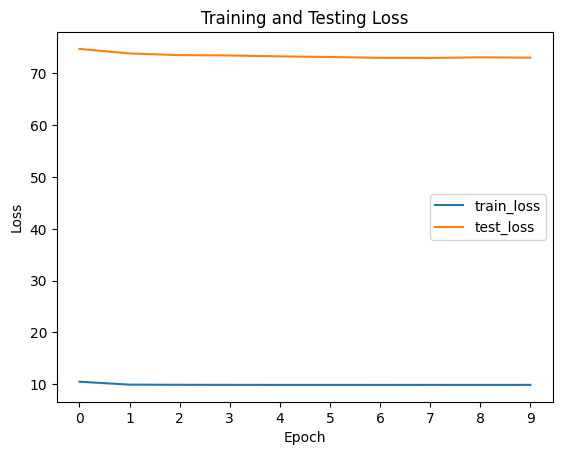

<Figure size 640x480 with 0 Axes>

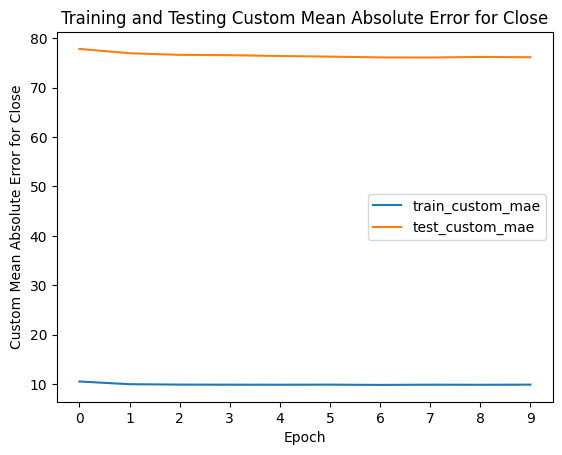

In [ ]:
plot_history(history)

In [ ]:
prediction = model.predict(train_x[-1:])

1/1 [==============================] - 0s 378ms/step


In [ ]:
prediction

array([[ 1.0512097 , -0.38724282,  6.287318  ,  0.1261216 , -0.04897647]],
      dtype=float32)

In [ ]:
train_x[-1:]

array([[[5.11681151e+01, 5.15448024e+01, 5.08089485e+01, 5.08352280e+01,
         1.05467000e+07],
        [5.07388654e+01, 5.10367111e+01, 5.06600272e+01, 5.07914276e+01,
         6.71720000e+06],
        [5.08089487e+01, 5.10279528e+01, 5.07476278e+01, 5.08264694e+01,
         7.44260000e+06],
        [5.10016726e+01, 5.15448018e+01, 5.07914272e+01, 5.12907562e+01,
         7.93310000e+06],
        [5.15097604e+01, 5.15448019e+01, 5.06162233e+01, 5.07563858e+01,
         8.77590000e+06],
        [5.10279577e+01, 5.22631407e+01, 5.07476327e+01, 5.21229782e+01,
         2.32867000e+07],
        [4.77253578e+01, 4.79005617e+01, 4.72610703e+01, 4.72873497e+01,
         2.02994000e+07],
        [4.78042154e+01, 4.79969401e+01, 4.72786069e+01, 4.79443779e+01,
         1.81209000e+07],
        [4.79618953e+01, 4.85751074e+01, 4.78918124e+01, 4.85575867e+01,
         1.47649000e+07],
        [4.87415470e+01, 4.91620344e+01, 4.86189052e+01, 4.87765884e+01,
         1.33315000e+07],
        [4

In [ ]:
train_y[-1:]

,Open,High,Low,Close,Volume
6319,48.382374,49.021865,46.788025,47.304874,53454800
